# Analiza slovenskih državnih tekmovanj v sestavljanju 3x3 rubikove kocke

## Uvod

Najprej naložimo potrebne knjižnice in uvozimo csv s podatki, ki smo jih pridobili s spletne strani:

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Naredimo slovarje s katerim dostopamo bodisi do podatkov celega tekmovanja bodisi do podatkov posamezne runde določenega tekmovanja

In [78]:
podatki_tekmovanj = {}
podatki_rund = {}
podatki = pd.read_csv("datoteke/csv/comp/SlovenianNationals.csv", index_col = "Mesto")
for leto in range(2019, 2026):
	comp_url = f"datoteke/csv/comp/SlovenianNationals{leto}.csv"
	if os.path.exists(comp_url):
		podatki_tekmovanj[leto] = pd.read_csv(comp_url, index_col = "Mesto")
		podatki_rund[leto] = {}
		for indeks in range(0,4):
			round_url = f"datoteke/csv/round/{leto}_round_{indeks}.csv"
			if os.path.exists(round_url):
				podatki_rund[leto][indeks] = pd.read_csv(round_url, index_col = "Mesto")

In [41]:
# podatki_tekmovanj[2019]
# podatki_rund[2025][0]
podatki

,Ime,Single,SingleRekord,Average,AverageRekord,Država,Poskusi,ImeRunde,IndeksRunde
Mesto,,,,,,,,,
1,Hunor Mogyorósi,7.14,NaN,8.11,NaN,hu,(7.14) 8.23 7.30 8.79 (13.29),3x3x3 Cube Final,0
2,Mattia Furlan,8.48,NaN,8.85,NaN,it,(9.20) (8.48) 8.66 8.96 8.94,3x3x3 Cube Final,0
3,Lir Ukaj,9.10,NaN,9.32,NaN,xk,9.16 9.61 (9.10) (11.42) 9.20,3x3x3 Cube Final,0
4,Gábor Slezák,7.02,NaN,9.66,NaN,hu,(11.41) 10.08 9.07 (7.02) 9.83,3x3x3 Cube Final,0
5,Marcel Ručigaj,9.51,NaN,10.63,NaN,si,(12.81) 11.57 (9.51) 10.76 9.56,3x3x3 Cube Final,0
...,...,...,...,...,...,...,...,...,...
120,Miha Kobal,40.28,NaN,46.53,NaN,si,43.90 50.48 (52.58) 45.20 (40.28),3x3x3 Cube First round,3
121,Marija Judež,43.19,NaN,51.52,NaN,si,(58.37) 54.48 44.52 (43.19) 55.57,3x3x3 Cube First round,3
122,Maks Kokalj Pezzano,48.88,NaN,52.91,NaN,si,57.03 51.19 (1:06.69) 50.50 (48.88),3x3x3 Cube First round,3


In [ ]:
podatki['Single'] = pd.to_numeric(podatki['Single'], errors='coerce')
najsingli = podatki.sort_values("Single", ascending=True)
najsingli

,Ime,Single,SingleRekord,Average,AverageRekord,Država,Poskusi,ImeRunde,IndeksRunde
Mesto,,,,,,,,,
1,Alexey Tsvetkov,4.90,NaN,6.64,NaN,ru,(4.90) (10.39) 7.91 5.58 6.43,3x3x3 Cube Semi Final,1
3,Gábor Slezák,5.13,NR,7.49,NaN,hu,7.14 (8.42) 8.07 7.25 (5.13),3x3x3 Cube Final,0
2,Dávid Szabó,5.26,NaN,6.78,NaN,hu,(5.26) 7.22 6.52 (7.82) 6.60,3x3x3 Cube Semi Final,1
1,Alexey Tsvetkov,5.28,NaN,5.99,NaN,ru,5.91 6.42 (6.92) 5.65 (5.28),3x3x3 Cube First round,3
1,Alexey Tsvetkov,5.38,NaN,6.51,NaN,ru,6.22 6.59 (8.82) 6.71 (5.38),3x3x3 Cube Second round,2
...,...,...,...,...,...,...,...,...,...
106,Jonatan Hladnik,NaN,NaN,4:08.68,NaN,si,(DNF) 3:54.43 4:28.84 (2:38.15) 4:02.76,3x3x3 Cube First round,2
107,Juraj Srečković,NaN,NaN,DNF,NaN,hr,DNF (1:30.21) 2:44.46 1:53.25 (DNF),3x3x3 Cube First round,2
108,Jonatan Hladnik,NaN,NaN,1:11.81,NaN,si,(1:02.41) 1:05.96 1:11.64 1:17.82 (1:51.78),3x3x3 Cube First round,3


In [84]:
podatki['Average'] = pd.to_numeric(podatki['Average'], errors='coerce')
najaverage = podatki.sort_values("Average", ascending=True)
najaverage

,Ime,Single,SingleRekord,Average,AverageRekord,Država,Poskusi,ImeRunde,IndeksRunde
Mesto,,,,,,,,,
1,Alexey Tsvetkov,5.77,NaN,5.88,NaN,ru,6.02 5.79 (5.77) (6.88) 5.82,3x3x3 Cube Final,0
1,Alexey Tsvetkov,5.28,NaN,5.99,NaN,ru,5.91 6.42 (6.92) 5.65 (5.28),3x3x3 Cube First round,3
1,Alexey Tsvetkov,5.38,NaN,6.51,NaN,ru,6.22 6.59 (8.82) 6.71 (5.38),3x3x3 Cube Second round,2
1,Alexey Tsvetkov,4.90,NaN,6.64,NaN,ru,(4.90) (10.39) 7.91 5.58 6.43,3x3x3 Cube Semi Final,1
2,Dávid Szabó,5.65,NaN,6.78,NaN,hu,(8.52) 8.14 6.36 5.83 (5.65),3x3x3 Cube First round,3
...,...,...,...,...,...,...,...,...,...
107,Matija Vidiček,46.46,NaN,NaN,NaN,si,1:33.13 55.92 (1:49.04) 50.84 (46.46),3x3x3 Cube First round,3
108,Jonatan Hladnik,NaN,NaN,NaN,NaN,si,(1:02.41) 1:05.96 1:11.64 1:17.82 (1:51.78),3x3x3 Cube First round,3
109,Jakov Grgić,NaN,NaN,NaN,NaN,hr,(1:34.41) 1:22.39 1:09.45 1:29.83 (1:04.73),3x3x3 Cube First round,3


AttributeError: 'DataFrame' object has no attribute 'dtype'

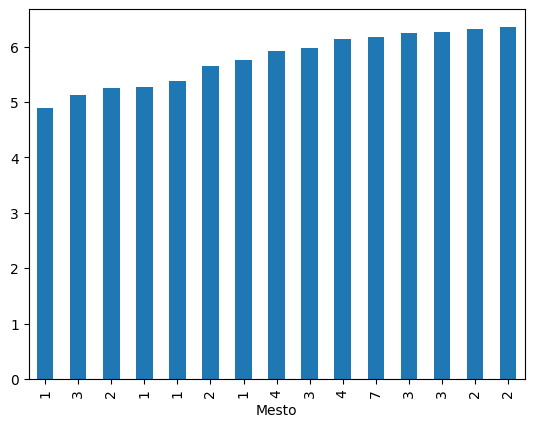

In [ ]:
najsingli.head(15)['Single'].plot.bar()

In [ ]:
average_finalov = {}
for leto in range(2019, 2026):
    if leto != 2020 and leto != 2021:
        average_finalov[leto] = (podatki_rund[leto][0].sort_values("Average", ascending = True).head(1)['Average'])
        print(average_finalov[leto])
# plt.bar(average_finalov.keys(), average_finalov.values())

       Average
Mesto         
1         8.11
       Average
Mesto         
1         7.48
       Average
Mesto         
1         8.86
       Average
Mesto         
1         7.76
       Average
Mesto         
1         5.88
